## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

# To help with reading and manipulation of data
import numpy as np
from numpy import array
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# To build a decision tree model
from sklearn.tree import DecisionTreeClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")
# To tune different models
from sklearn.model_selection import RandomizedSearchCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

## Import Dataset

In [ ]:

url = "/content/drive/My Drive/UTA_AI_ML/Bagging_assignment/EasyVisa.csv"
#url = "/content/drive/My Drive/EasyVisa.csv"
visaData = pd.read_csv(url)
df = visaData.copy()


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

In [ ]:
df['case_status'].value_counts()

,case_status
Certified,17018
Denied,8462


#### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Fixing the negative values in number of employees columns

In [ ]:
# Check for negative values in 'no_of_employees'
negative_employees = df[df['no_of_employees'] < 0]

# Print the rows with negative values (if any)
print(negative_employees)

# Count the number of negative values
num_negative = len(negative_employees)

# There were few ways to handle negative value like replacing it with median (since it is a skewed data) or replace it with positive
# Based on the assumptions that it was a mistake during the data entry (as we can't confirm it with the business) I am converting it to positive value
df['no_of_employees'] = df['no_of_employees'].abs()
negative_employees_fix = df[df['no_of_employees'] < 0]
print("the rows with negative values if any")
print(negative_employees_fix)
print(df)

         case_id      continent education_of_employee has_job_experience  \
245      EZYV246         Europe              Master's                  N   
378      EZYV379           Asia            Bachelor's                  N   
832      EZYV833  South America              Master's                  Y   
2918    EZYV2919           Asia              Master's                  Y   
6439    EZYV6440           Asia            Bachelor's                  N   
6634    EZYV6635           Asia            Bachelor's                  Y   
7224    EZYV7225         Europe             Doctorate                  N   
7281    EZYV7282           Asia           High School                  N   
7318    EZYV7319           Asia            Bachelor's                  Y   
7761    EZYV7762           Asia              Master's                  N   
9872    EZYV9873         Europe              Master's                  Y   
11493  EZYV11494           Asia           High School                  Y   
13471  EZYV1

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
print(df.continent.value_counts())
print(df.education_of_employee.value_counts())
print(df.has_job_experience.value_counts())
print(df.requires_job_training.value_counts())
print(df.no_of_employees.value_counts())
print(df.yr_of_estab.value_counts())
print(df.region_of_employment.value_counts())
print(df.prevailing_wage.value_counts())
print(df.unit_of_wage.value_counts())
print(df.full_time_position.value_counts())
print(df.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: no_of_employees, Length: 7105, dtype: int64
1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
82560.2800     2
122.6500       2
60948.1500     2
64357.5800     2
108.1200    

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

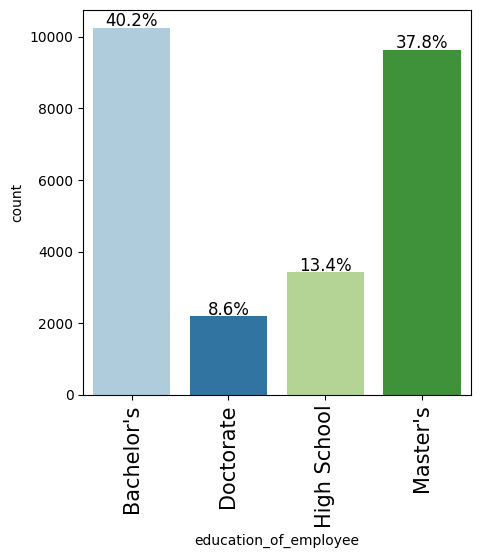


Observations on education of employee:
- The majority of applicants have a Bachelor's or Master's degree.
- A small percentage of applicants have a Doctorate or High School degree.
- Further analysis is needed to determine if education level has a significant impact on visa approvals.


In [ ]:
labeled_barplot(df, 'education_of_employee', perc=True)
print("\nObservations on education of employee:")
print("- The majority of applicants have a Bachelor's or Master's degree.")
print("- A small percentage of applicants have a Doctorate or High School degree.")
print("- Further analysis is needed to determine if education level has a significant impact on visa approvals.")

#### Observations on region of employment

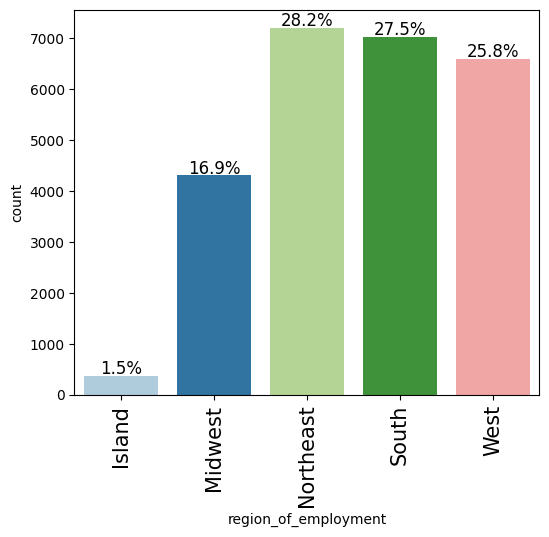


Observations on region of employment:
- The Northeast,west and South regions have the highest number of visa applications.
- Midwest and island regions have a relatively lower number of applications.
- We need to investigate if the region of employment influences visa approval rates.


In [ ]:
labeled_barplot(df, 'region_of_employment', perc=True)
print("\nObservations on region of employment:")
print("- The Northeast,west and South regions have the highest number of visa applications.")
print("- Midwest and island regions have a relatively lower number of applications.")
print("- We need to investigate if the region of employment influences visa approval rates.")

#### Observations on job experience

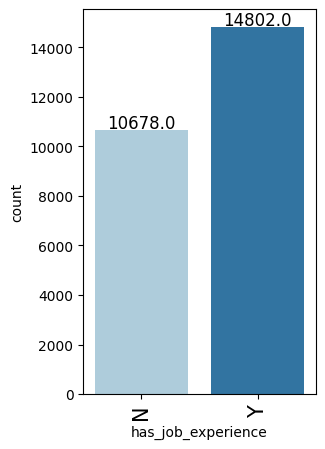


Observations on job experience:
- Applicants with job experience have the highest number of visa applications.
- We need to investigate if the job experience influences visa approval rates.


In [ ]:
labeled_barplot(df, 'has_job_experience')
print("\nObservations on job experience:")
print("- Applicants with job experience have the highest number of visa applications.")
print("- We need to investigate if the job experience influences visa approval rates.")

#### Observations on case status

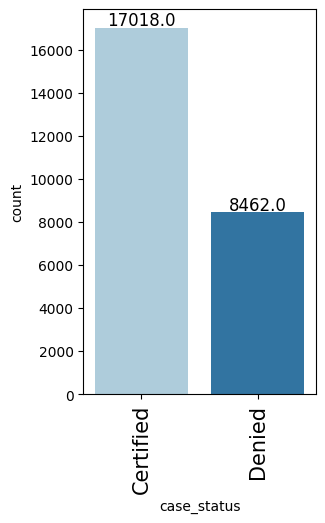


Observations on case status:
- There are almost double the amount of certified than Denied. It means there are signicantly more certified than Denied


In [ ]:
labeled_barplot(df, 'case_status')
print("\nObservations on case status:")
print("- There are almost double the amount of certified than Denied. It means there are signicantly more certified than Denied")

### Bivariate Analysis

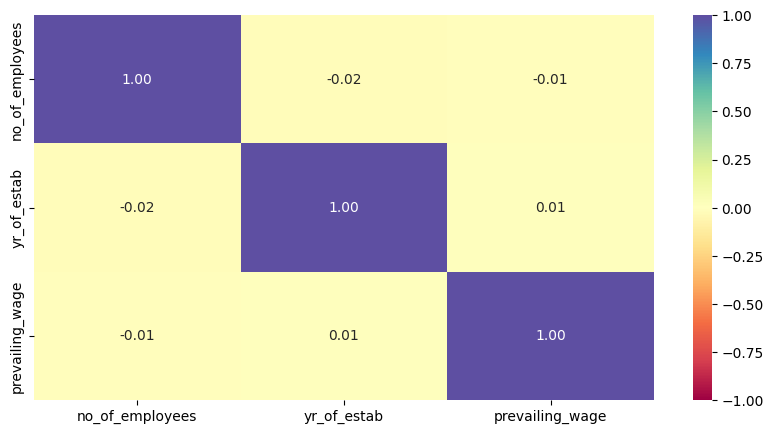

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

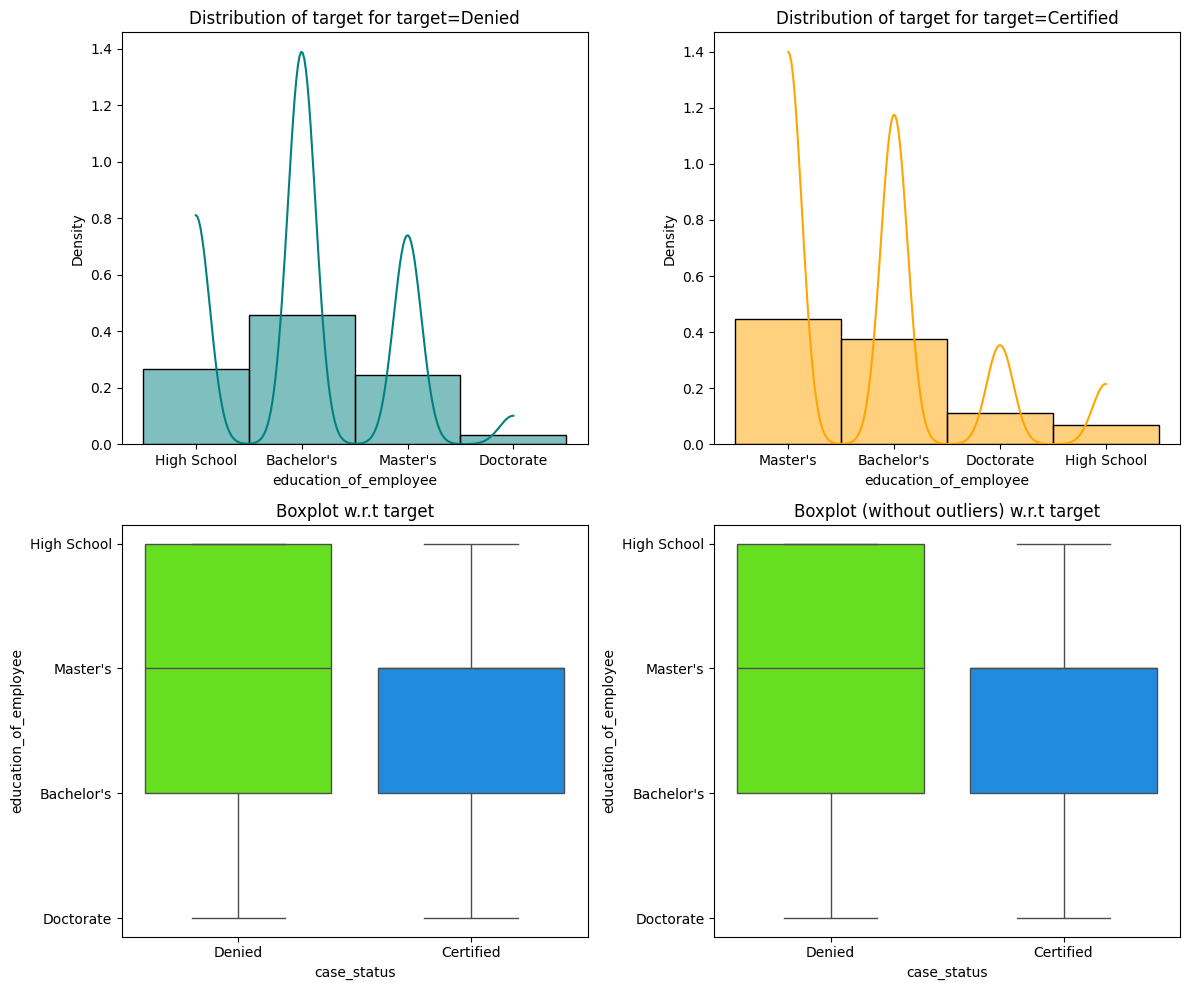


Observations on the case status based on the education of employee:
- The higher education has a higher chance of getting certied.


In [ ]:
distribution_plot_wrt_target(df, 'education_of_employee', 'case_status')

print("\nObservations on the case status based on the education of employee:")
print("- The higher education has a higher chance of getting certied.")


case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


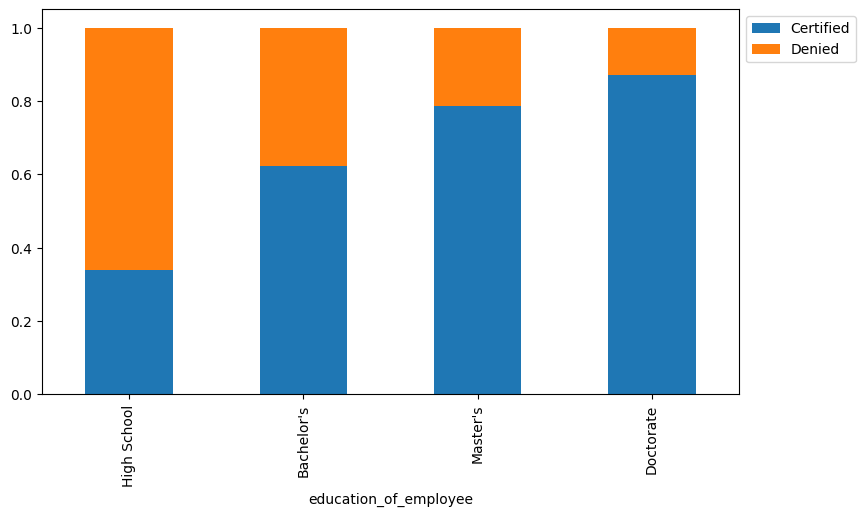

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


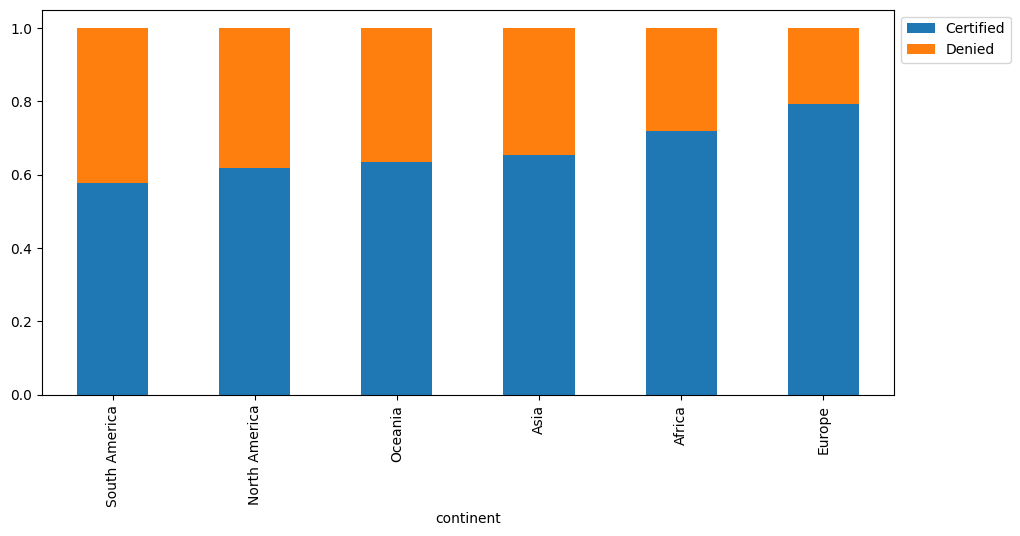

In [ ]:
stacked_barplot(df, "continent", "case_status")

In [ ]:
print("\nObservations on the case status based across different continents:")
print("- , there are variations in visa approval rates across continents. Some continents have higher approval rates than others.")


Observations on the case status based across different continents:
- , there are variations in visa approval rates across continents. Some continents have higher approval rates than others.


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

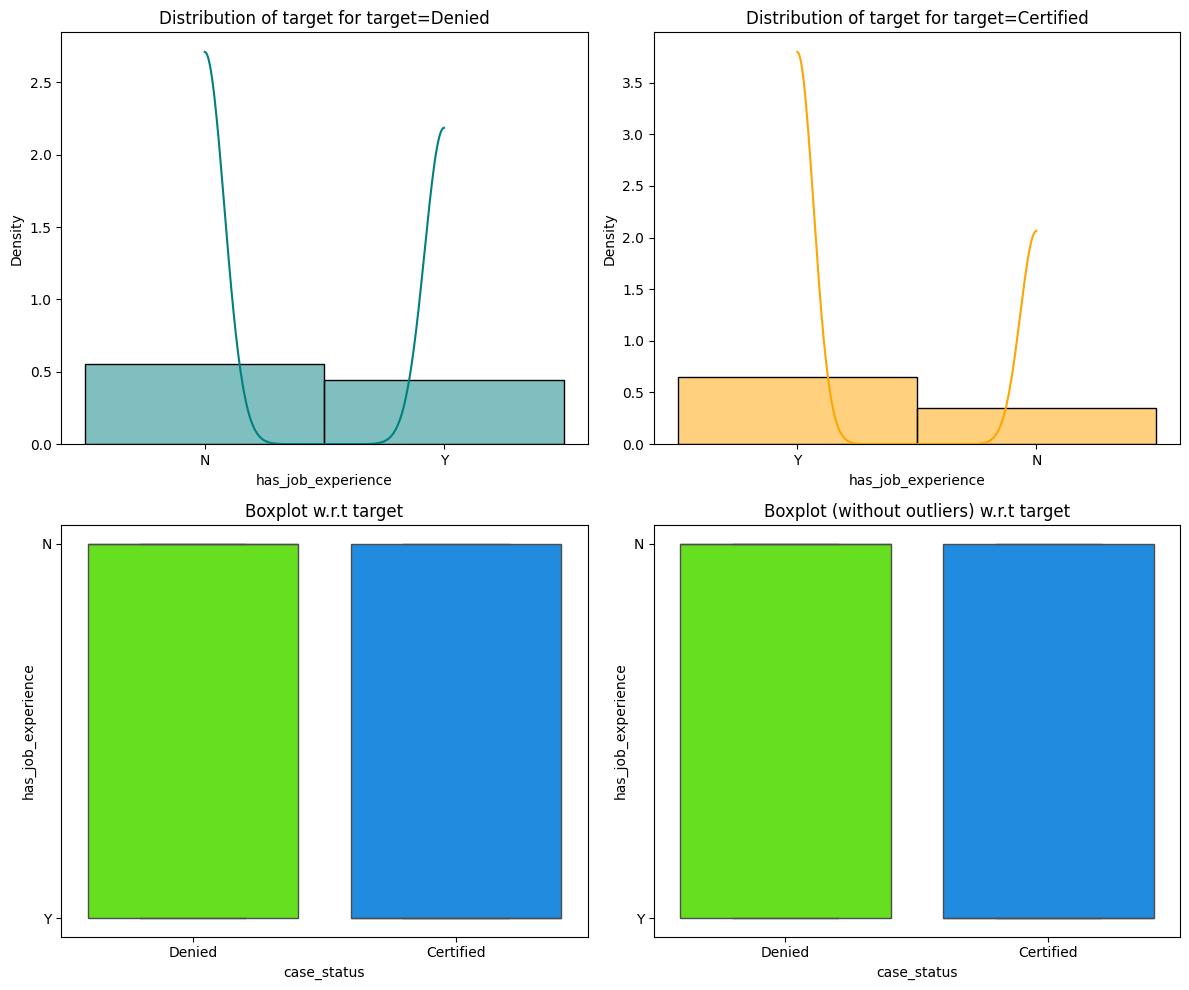

In [ ]:
distribution_plot_wrt_target(df, "has_job_experience", "case_status")

In [ ]:
print("\nObservations on the case status based on job experience")
print("- , Applicants with job experience have a higher probability of their visa applications getting certified.")


Observations on the case status based on job experience
- , Applicants with job experience have a higher probability of their visa applications getting certified.


#### Checking if the prevailing wage is similar across all the regions of the US

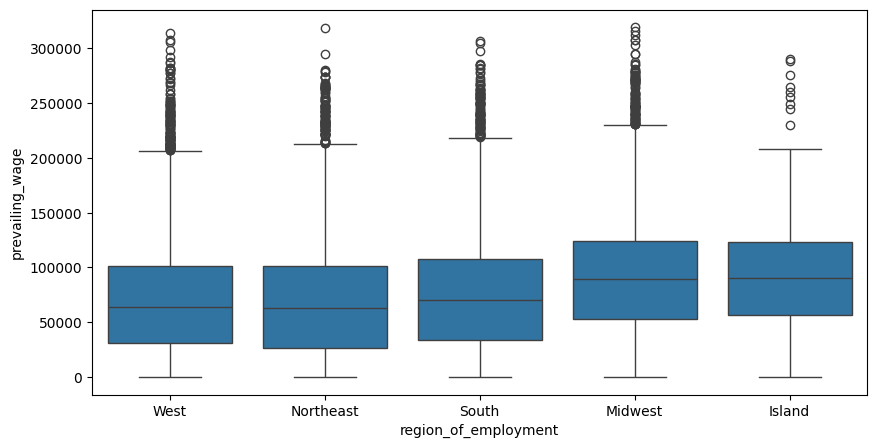

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=df)
plt.show()

In [ ]:
print("\nObservations on the prevailing wages across different regions:")
print("- , The median wages in Midwest and Island are higher than other regions. However there are more outliers in the other regions and also the median would be affected by whether these are hourly, yearly, monthly etc wages. So, further investigation is needed.")


Observations on the prevailing wages across different regions:
- , The median wages in Midwest and Island are higher than other regions. However there are more outliers in the other regions and also the median would be affected by whether these are hourly, yearly, monthly etc wages. So, further investigation is needed.


#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

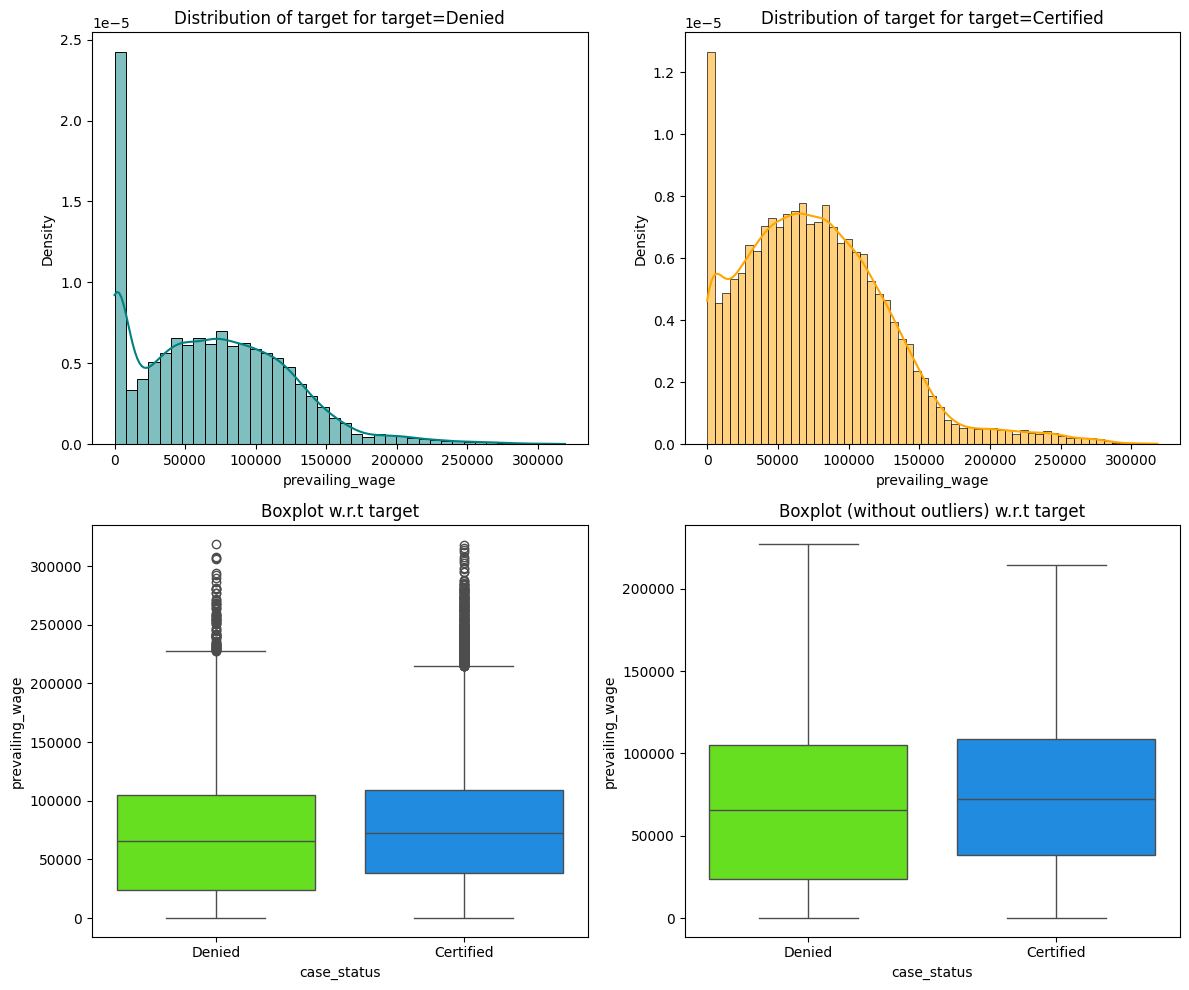

In [ ]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')


In [ ]:
print("\nObservations on the prevailing wages in regards to case status:")
print("- , There is a general trend of higher prevailing wages to higher chance of approval but there are other factors that needs to be considered example the unit of wage and outliers.")


Observations on the prevailing wages in regards to case status:
- , There is a general trend of higher prevailing wages to higher chance of approval but there are other factors that needs to be considered example the unit of wage and outliers.


#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


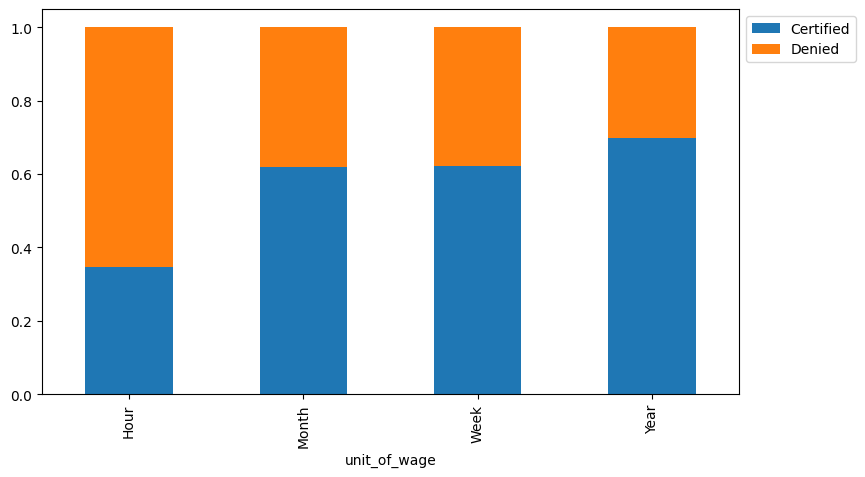

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

In [ ]:
print("\nObservations on the unit of wage in regards to case status:")
print("- , Yearly employees cases are more ceritied than others. It could be because of the permanent positions are more likely to approved than contractor positions")


Observations on the unit of wage in regards to case status:
- , Yearly employees cases are more ceritied than others. It could be because of the permanent positions are more likely to approved than contractor positions


## Data Pre-processing

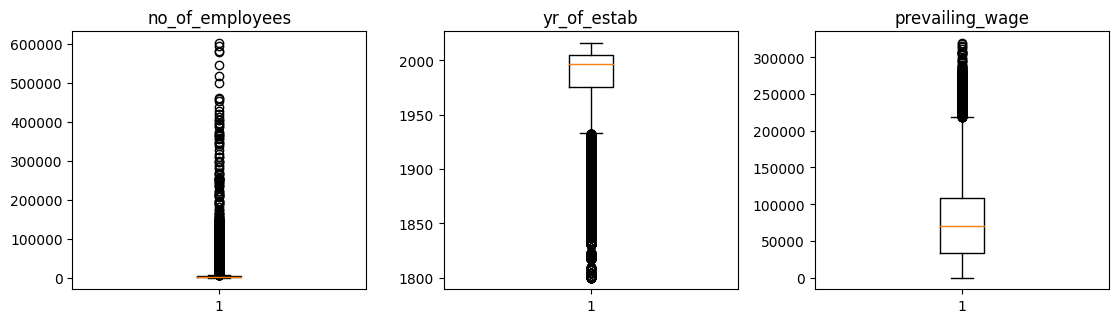

In [ ]:

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outlier Check

There are outliers in no_of_employees, yr_of_estab and prevailing_wages. However, we don't need to treat them. The reason is:
1. **no_of_employees**: Outliers could represent larger companies. Removing them could bias the model against these companies.
2. **yr_of_estab**: Outliers here could represent genuine, older companies. Removing them might lose valuable information.
3. **prevailing_wage**: Since the prevailing wages have different unit of wages, treating them would remove inportant data or make the model biased toward certain wages.

### Data Preparation for modeling

In [ ]:
replaceStruct = {
                "unit_of_wage":     {"Hour": 1, "Week": 2 ,"Month": 3 ,"Year":4},
                "education_of_employee": {    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "Doctorate": 4},
                 "requires_job_training":    {"N": 0, "Y": 1 },
                "has_job_experience":     {"N": 0, "Y": 1 },
                "full_time_position":     {"N": 0, "Y": 1 },
                "case_status":     {"Denied": 0, "Certified": 1 }
                    }
oneHotCols=["continent","region_of_employment"]

In [ ]:
# separating the independent and dependent variables
df = df.drop(["case_id"], axis=1)
df=df.replace(replaceStruct)
X = df.drop(["case_status"], axis=1)
y = df["case_status"]



X=pd.get_dummies(X, columns=oneHotCols,dtype=bool)
X.head(10)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   yr_of_estab                     25480 non-null  int64  
 5   prevailing_wage                 25480 non-null  float64
 6   unit_of_wage                    25480 non-null  int64  
 7   full_time_position              25480 non-null  int64  
 8   continent_Africa                25480 non-null  bool   
 9   continent_Asia                  25480 non-null  bool   
 10  continent_Europe                25480 non-null  bool   
 11  continent_North America         25480 non-null  bool   
 12  continent_Oceania               

## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
#A false negative (predicting denial when the visa would have been certified) can have consequences like delaying or preventing the opportunities.
#Companies need to fill critical roles with qualified individuals. A false positive (predicting certification when the visa would have been denied) can lead to wasted time and resources.
#We might need to find a balance between Recall and Precision based on the business requirements.
#Precision: We need to measure correctly predicted certifications out of all predicted certifications. High precision means fewer false positives.
#Recall: We need to measure correctly predicted certifications out of all actual certifications. High recall means fewer false negatives.
# Hence we will go with F1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(12740, 19) (7644, 19) (5096, 19)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 50)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 50)


# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Target value ratio in y
1    0.667896
0    0.332104
Name: case_status, dtype: float64
**************************************************
Target value ratio in y_train
1    0.667896
0    0.332104
Name: case_status, dtype: float64
**************************************************
Target value ratio in y_val
1    0.667844
0    0.332156
Name: case_status, dtype: float64
**************************************************
Target value ratio in y_test
1    0.667975
0    0.332025
Name: case_status, dtype: float64
**************************************************
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------


In [ ]:

bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:

model_performance_classification_sklearn(bagging_estimator,X_train,y_train)


,Accuracy,Recall,Precision,F1
0,0.984066,0.985545,0.99055,0.988041


In [ ]:
model_performance_classification_sklearn(bagging_estimator,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.698064,0.77904,0.771185,0.775093


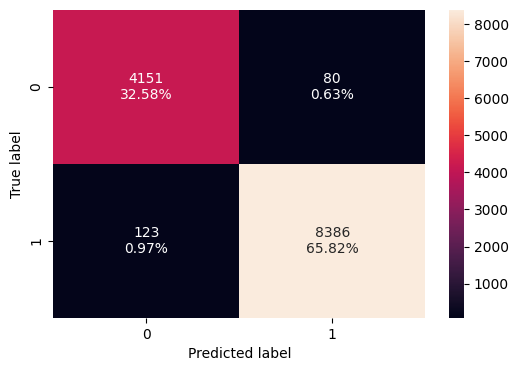

In [ ]:
confusion_matrix_sklearn(bagging_estimator,X_train,y_train)

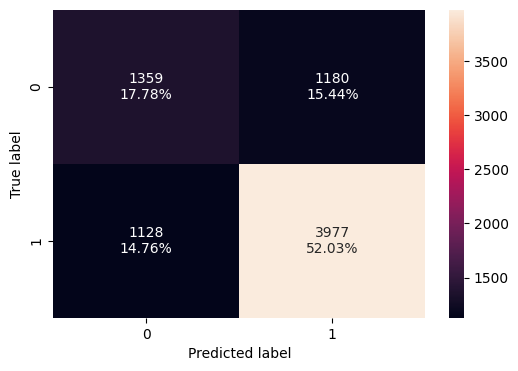

In [ ]:
confusion_matrix_sklearn(bagging_estimator,X_val,y_val)

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
model_performance_classification_sklearn(rf_estimator,X_train,y_train)

,Accuracy,Recall,Precision,F1
0,0.999922,1.0,0.999882,0.999941


In [ ]:
# Predicting the target for train and validation set
model_performance_classification_sklearn(rf_estimator,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.724359,0.839569,0.768927,0.802697


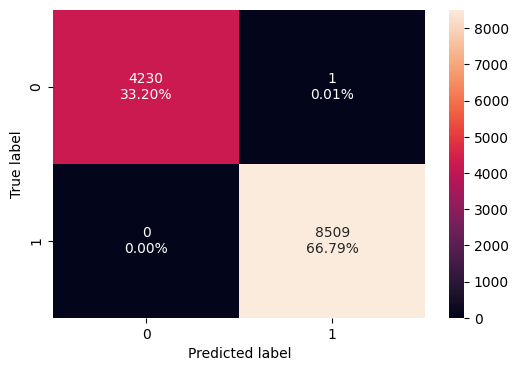

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

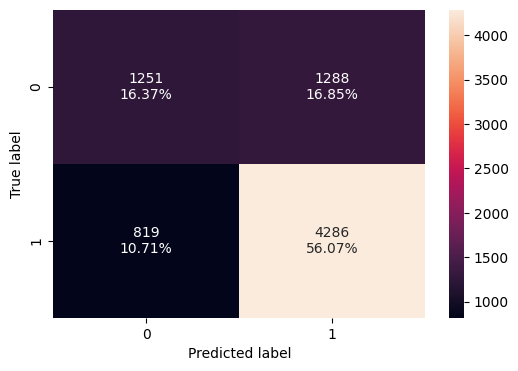

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_val,y_val)

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
model_performance_classification_sklearn(abc,X_train,y_train)

,Accuracy,Recall,Precision,F1
0,0.736656,0.888354,0.758631,0.818384


In [ ]:
model_performance_classification_sklearn(abc,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.734956,0.895788,0.75375,0.818654


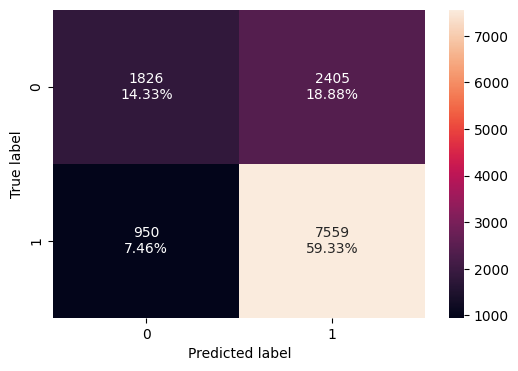

In [ ]:
confusion_matrix_sklearn(abc,X_train,y_train)

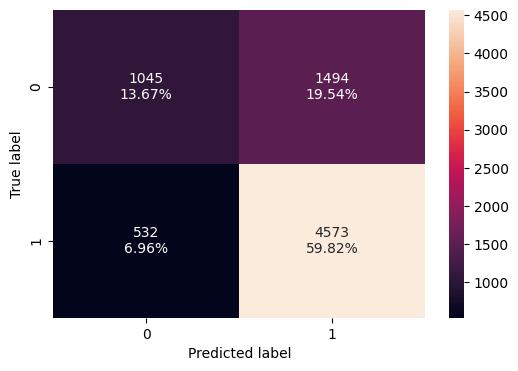

In [ ]:
confusion_matrix_sklearn(abc,X_val,y_val)

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
model_performance_classification_sklearn(gbc,X_train,y_train)

,Accuracy,Recall,Precision,F1
0,0.7573,0.877776,0.784476,0.828508


In [ ]:
model_performance_classification_sklearn(gbc,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.754186,0.882468,0.778873,0.827441


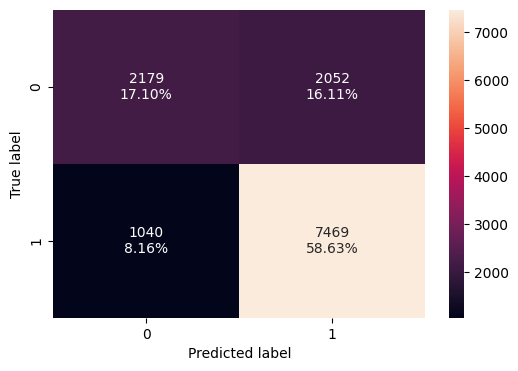

In [ ]:
confusion_matrix_sklearn(gbc,X_train,y_train)

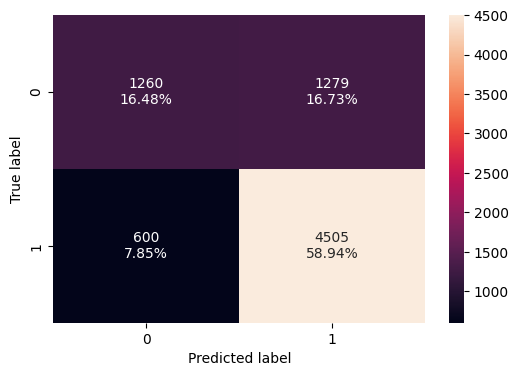

In [ ]:
confusion_matrix_sklearn(gbc,X_val,y_val)

In [ ]:
X_train.info()
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12740 entries, 19653 to 19943
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           12740 non-null  int64  
 1   has_job_experience              12740 non-null  int64  
 2   requires_job_training           12740 non-null  int64  
 3   no_of_employees                 12740 non-null  int64  
 4   yr_of_estab                     12740 non-null  int64  
 5   prevailing_wage                 12740 non-null  float64
 6   unit_of_wage                    12740 non-null  int64  
 7   full_time_position              12740 non-null  int64  
 8   continent_Africa                12740 non-null  bool   
 9   continent_Asia                  12740 non-null  bool   
 10  continent_Europe                12740 non-null  bool   
 11  continent_North America         12740 non-null  bool   
 12  continent_Oceania           

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 8509
Before OverSampling, count of label '0': 4231 

After OverSampling, count of label '1': 8509
After OverSampling, count of label '0': 8509 

After OverSampling, the shape of train_X: (17018, 19)
After OverSampling, the shape of train_y: (17018,) 



### Model Building with oversampled data

In [ ]:

bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train_over,y_train_over)

BaggingClassifier(random_state=1)

In [ ]:
# Predicting the target for over - train and validation set
model_performance_classification_sklearn(bagging_estimator,X_train_over,y_train_over)

,Accuracy,Recall,Precision,F1
0,0.985545,0.978493,0.99249,0.985442


In [ ]:
model_performance_classification_sklearn(bagging_estimator,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.698325,0.760823,0.781646,0.771094


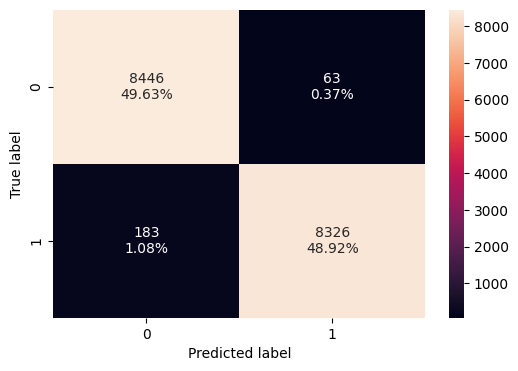

In [ ]:
confusion_matrix_sklearn(bagging_estimator,X_train_over,y_train_over)

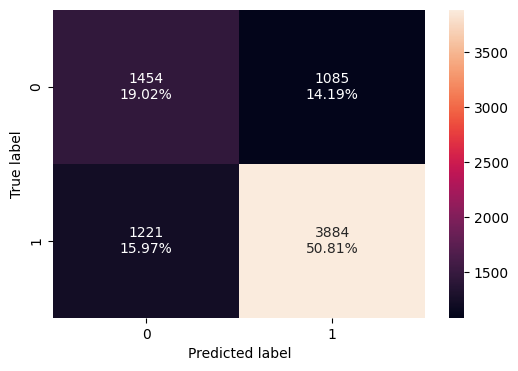

In [ ]:
confusion_matrix_sklearn(bagging_estimator,X_val,y_val)

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
# Predicting the target for over train and validation set
model_performance_classification_sklearn(rf_estimator,X_train_over,y_train_over)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# Predicting the target for train and validation set
model_performance_classification_sklearn(rf_estimator,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.720434,0.815279,0.777072,0.795717


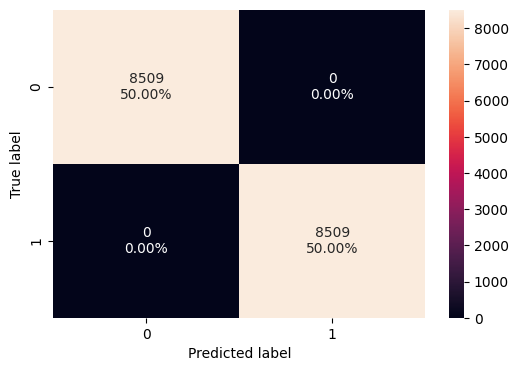

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_train_over,y_train_over)

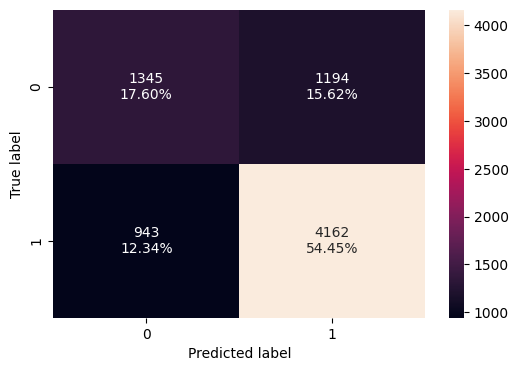

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_val,y_val)

In [ ]:
# Predicting the target for over train and validation set
model_performance_classification_sklearn(abc,X_train_over,y_train_over)

,Accuracy,Recall,Precision,F1
0,0.69068,0.888354,0.636655,0.741733


In [ ]:
model_performance_classification_sklearn(abc,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.734956,0.895788,0.75375,0.818654


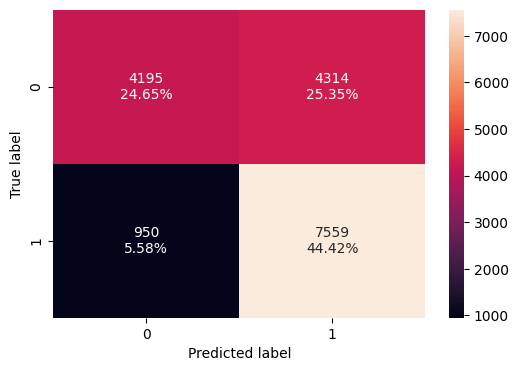

In [ ]:
confusion_matrix_sklearn(abc,X_train_over,y_train_over)

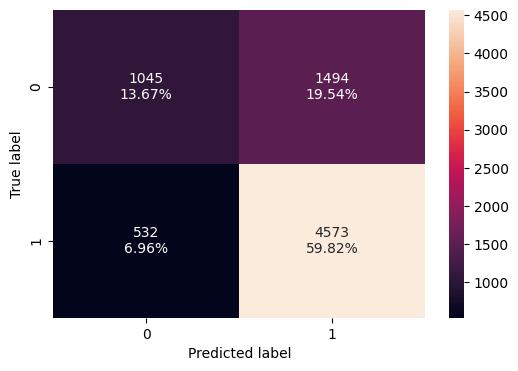

In [ ]:
confusion_matrix_sklearn(abc,X_val,y_val)

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

In [ ]:
model_performance_classification_sklearn(gbc,X_train_over,y_train_over)

,Accuracy,Recall,Precision,F1
0,0.800858,0.850276,0.773797,0.810236


In [ ]:
model_performance_classification_sklearn(gbc,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.748038,0.856219,0.785727,0.81946


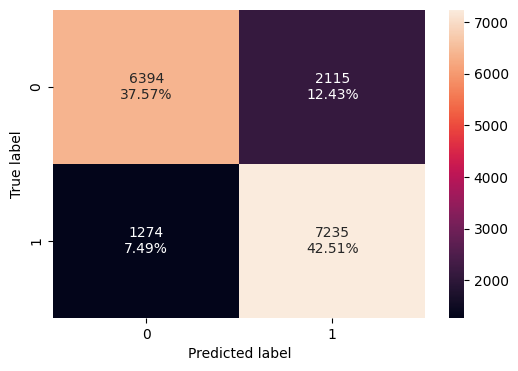

In [ ]:
confusion_matrix_sklearn(gbc,X_train_over,y_train_over)

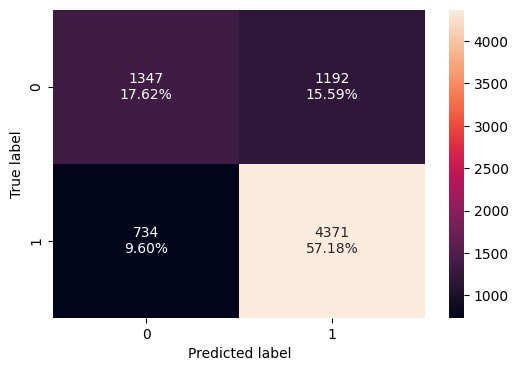

In [ ]:
confusion_matrix_sklearn(gbc,X_val,y_val)

### Model Building with undersampled data

In [ ]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:

bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train_un,y_train_un)

BaggingClassifier(random_state=1)

In [ ]:
# Predicting the target for under train and validation set
model_performance_classification_sklearn(bagging_estimator,X_train_un,y_train_un)

,Accuracy,Recall,Precision,F1
0,0.980737,0.970693,0.990593,0.980542


In [ ]:
model_performance_classification_sklearn(bagging_estimator,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.64325,0.607444,0.810931,0.694591


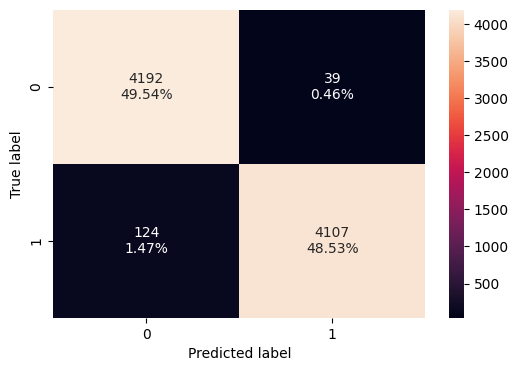

In [ ]:
confusion_matrix_sklearn(bagging_estimator,X_train_un,y_train_un)

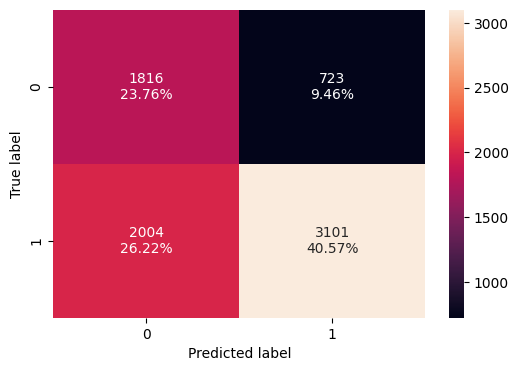

In [ ]:
confusion_matrix_sklearn(bagging_estimator,X_val,y_val)

In [ ]:
#Train the random forest classifier on undersample
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_un,y_train_un)

RandomForestClassifier(random_state=1)

In [ ]:
# Predicting the target for under train and validation set
model_performance_classification_sklearn(rf_estimator,X_train_un,y_train_un)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# Predicting the target for under train and validation set
model_performance_classification_sklearn(rf_estimator,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.679487,0.673849,0.814201,0.737406


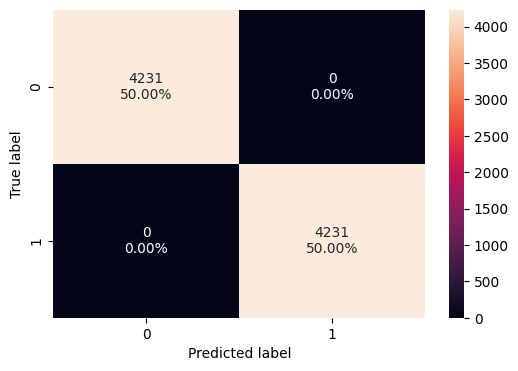

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_train_un,y_train_un)

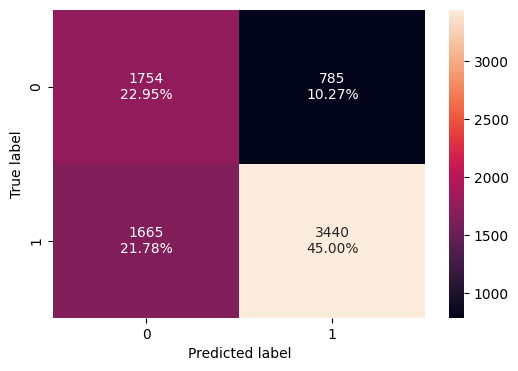

In [ ]:
confusion_matrix_sklearn(rf_estimator,X_val,y_val)

In [ ]:

abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [ ]:

model_performance_classification_sklearn(abc,X_train_un,y_train_un)

,Accuracy,Recall,Precision,F1
0,0.703616,0.707634,0.701993,0.704802


In [ ]:
model_performance_classification_sklearn(abc,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.697933,0.707346,0.815861,0.757738


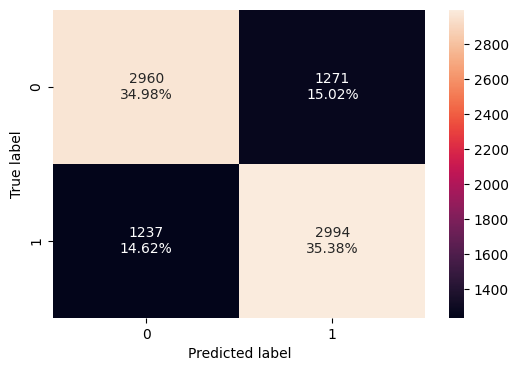

In [ ]:
confusion_matrix_sklearn(abc,X_train_un,y_train_un)

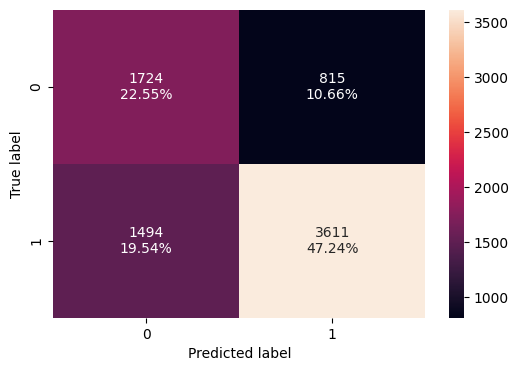

In [ ]:
confusion_matrix_sklearn(abc,X_val,y_val)

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

In [ ]:
model_performance_classification_sklearn(gbc,X_train_un,y_train_un)

,Accuracy,Recall,Precision,F1
0,0.72536,0.721342,0.727186,0.724252


In [ ]:
model_performance_classification_sklearn(gbc,X_val,y_val)

,Accuracy,Recall,Precision,F1
0,0.70696,0.709892,0.826831,0.763912


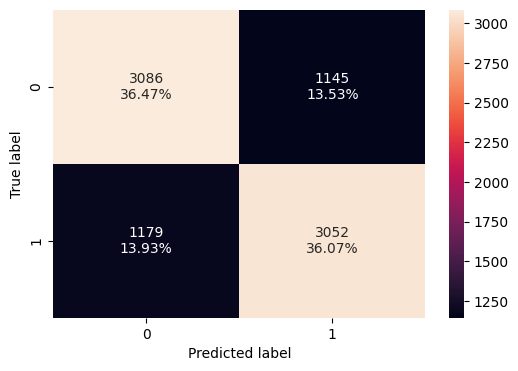

In [ ]:
confusion_matrix_sklearn(gbc,X_train_un,y_train_un)

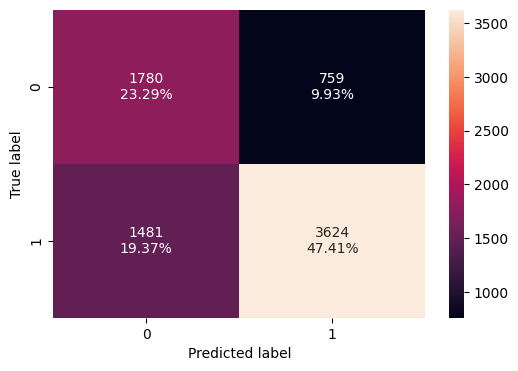

In [ ]:
confusion_matrix_sklearn(gbc,X_val,y_val)

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:

abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters

parameters = {
    "estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1),DecisionTreeClassifier(max_depth=4, random_state=1)],
    "n_estimators": np.arange(10,100,10),
    "learning_rate":np.arange(0.1,2,0.1)
}



# Run the grid search
grid_obj = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=1.1, random_state=1)

In [ ]:
abc_tuned_train_data = model_performance_classification_sklearn(abc_tuned,X_train_over,y_train_over)
abc_tuned_train_data

,Accuracy,Recall,Precision,F1
0,0.798684,0.839934,0.77592,0.806659


In [ ]:

abc_tuned_val_data=model_performance_classification_sklearn(abc_tuned,X_val,y_val)
abc_tuned_val_data

,Accuracy,Recall,Precision,F1
0,0.738749,0.844074,0.782033,0.81187


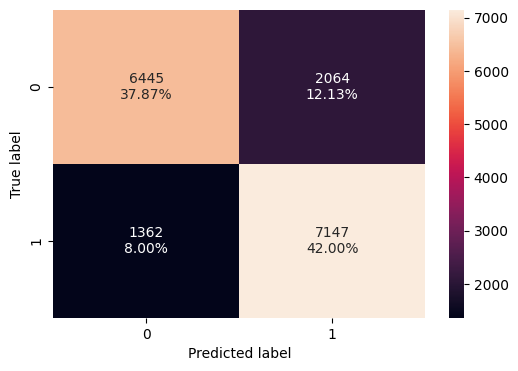

In [ ]:
confusion_matrix_sklearn(abc_tuned,X_train_over,y_train_over)

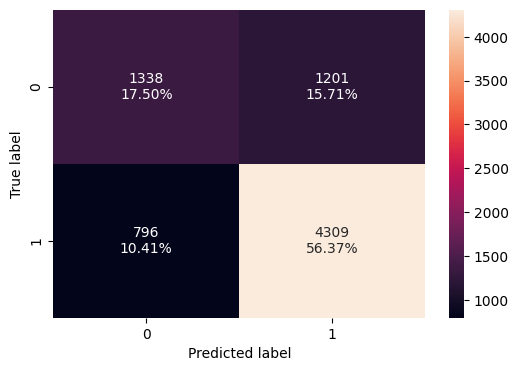

In [ ]:
confusion_matrix_sklearn(abc_tuned,X_val,y_val)

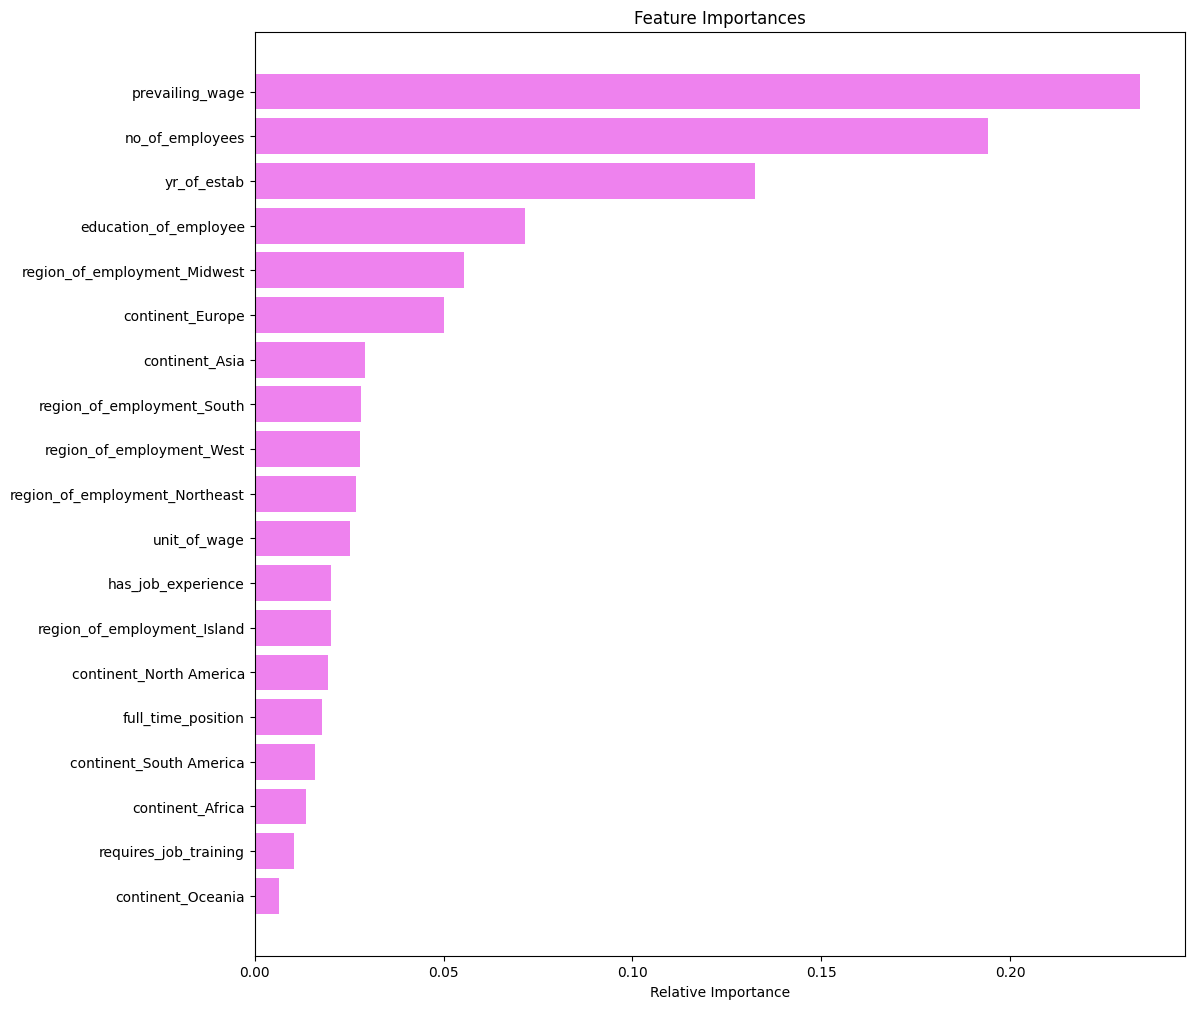

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuning Random forest using undersampled data

In [ ]:

rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters
parameters = {"n_estimators": [150,200,250,300],
    "min_samples_leaf": np.arange(5, 10,1),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Run the grid search
grid_obj = RandomizedSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_un, y_train_un)


rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features=0.30000000000000004,
                       max_samples=0.6000000000000001, min_samples_leaf=7,
                       n_estimators=150, random_state=1)

In [ ]:
rf_tuned_train_data = model_performance_classification_sklearn(rf_estimator_tuned,X_train_un,y_train_un)
rf_tuned_train_data

,Accuracy,Recall,Precision,F1
0,0.774876,0.776412,0.774034,0.775221


In [ ]:
rf_tuned_val_data =  model_performance_classification_sklearn(rf_estimator_tuned,X_val,y_val)
rf_tuned_train_data

,Accuracy,Recall,Precision,F1
0,0.774876,0.776412,0.774034,0.775221


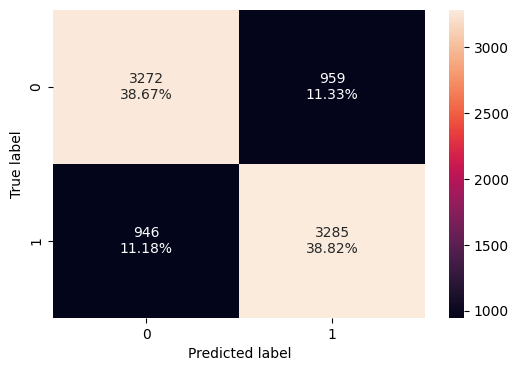

In [ ]:
confusion_matrix_sklearn(rf_estimator_tuned,X_train_un,y_train_un)

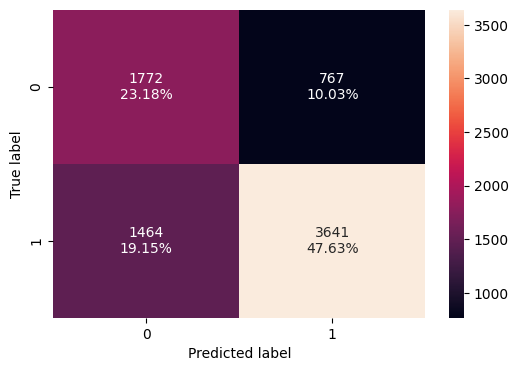

In [ ]:
confusion_matrix_sklearn(rf_estimator_tuned,X_val,y_val)

### Tuning with Gradient boosting with oversampled data

In [ ]:

gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Run the grid search
grid_obj = RandomizedSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

In [ ]:
gbc_tuned_train_data = model_performance_classification_sklearn(gbc_tuned,X_train_over,y_train_over)
gbc_tuned_train_data

,Accuracy,Recall,Precision,F1
0,0.803443,0.842755,0.781325,0.810878


In [ ]:
gbc_tuned_val_data = model_performance_classification_sklearn(gbc_tuned,X_val,y_val)
gbc_tuned_val_data

,Accuracy,Recall,Precision,F1
0,0.745814,0.847013,0.788188,0.816542


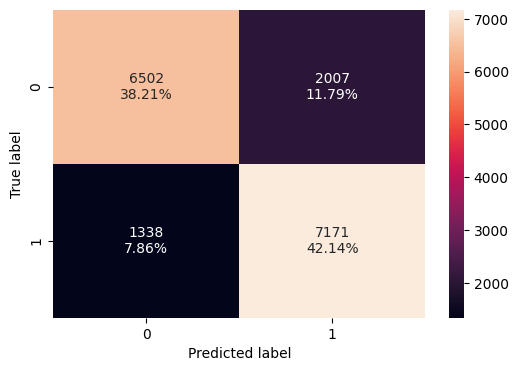

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_train_over,y_train_over)

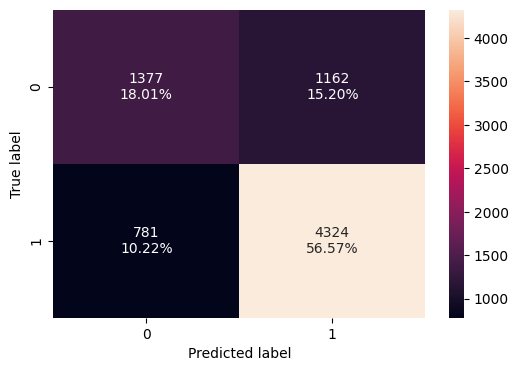

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_val,y_val)

### Tuning XGBoost using oversampled data

In [ ]:
# Since XGBoost is taking a long time to execute I have written the code but not executing it.
# xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# parameters = {
    # "n_estimators": np.arange(10,100,20),
    # "scale_pos_weight":[0,1,2,5],
    # "subsample":[0.5,0.7,0.9,1],
    # "learning_rate":[0.01,0.1,0.2,0.05],
    # "gamma":[0,1,3],
    # "colsample_bytree":[0.5,0.7,0.9,1],
    # "colsample_bylevel":[0.5,0.7,0.9,1]
# }


# Run the grid search
# grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
# grid_obj = grid_obj.fit(X_train_over, y_train_over)

# xgb_tuned = grid_obj.best_estimator_


# xgb_tuned.fit(X_train_over, y_train_over)

In [ ]:
# xgb_tuned_train_data = model_performance_classification_sklearn(xgb_tuned,X_train_over,y_train_over)
# xgb_tuned_train_data

In [ ]:
# xgb_tuned_val_data = model_performance_classification_sklearn(xgb_tuned,X_val,y_val)
# xgb_tuned_val_data

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# performance comparison

models_train_comp_df = pd.concat(
    [
        abc_tuned_train_data.T,
        rf_tuned_train_data.T,
        gbc_tuned_train_data.T,
        abc_tuned_val_data.T,
        rf_tuned_val_data.T,
        gbc_tuned_val_data.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Ada Boosting tuned with oversampled data",
    "Random forest tuned with undersamples data",
    "Gradient Boost tuned with oversampled data",
    "Ada Boosting on validation tuned with oversampled data",
    "Random forest on validation  tuned with undersamples data",
    "Gradient Boost on validation  tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Ada Boosting tuned with oversampled data,Random forest tuned with undersamples data,Gradient Boost tuned with oversampled data,Ada Boosting on validation tuned with oversampled data,Random forest on validation tuned with undersamples data,Gradient Boost on validation tuned with oversampled data
Accuracy,0.798684,0.774876,0.803443,0.738749,0.708137,0.745814
Recall,0.839934,0.776412,0.842755,0.844074,0.713222,0.847013
Precision,0.775920,0.774034,0.781325,0.782033,0.825998,0.788188
F1,0.806659,0.775221,0.810878,0.811870,0.765479,0.816542


## Actionable Insights and Recommendations

Since the F1 score difference between Ada boosting with oversamples data and Gradient Boosting is very narrow, we consider the recall score as a secondary metric. In this case, Gradient Boosting has a higher recall score on the validation set compared to Ada Boosting.

Recommendation:

Based on the F1 score and the recall score as a secondary metric, Gradient Boosting (Tuned with Oversampled Data) appears to be the best-performing model in this scenario. It has the highest validation F1-Score (0.816542) and also have a higher recall score compared to Ada Boosting when considering their very close F1 scores.

Therefore, Gradient Forest (Tuned with oversampled Data) is the recommended model for this scenario due to its better balance between precision, recall, and overall F1 score, particularly on validation data.

In [ ]:
#final test on test data
gbc_tuned_test = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_test

,Accuracy,Recall,Precision,F1
0,0.740385,0.846063,0.782821,0.813215


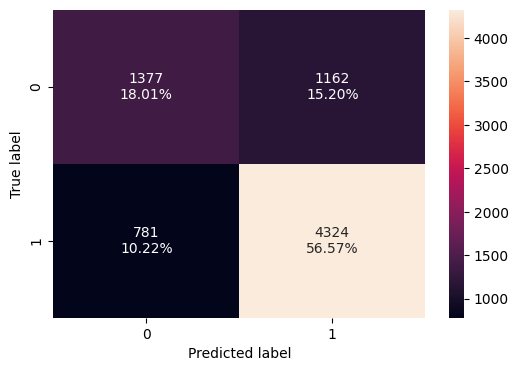

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_val,y_val)

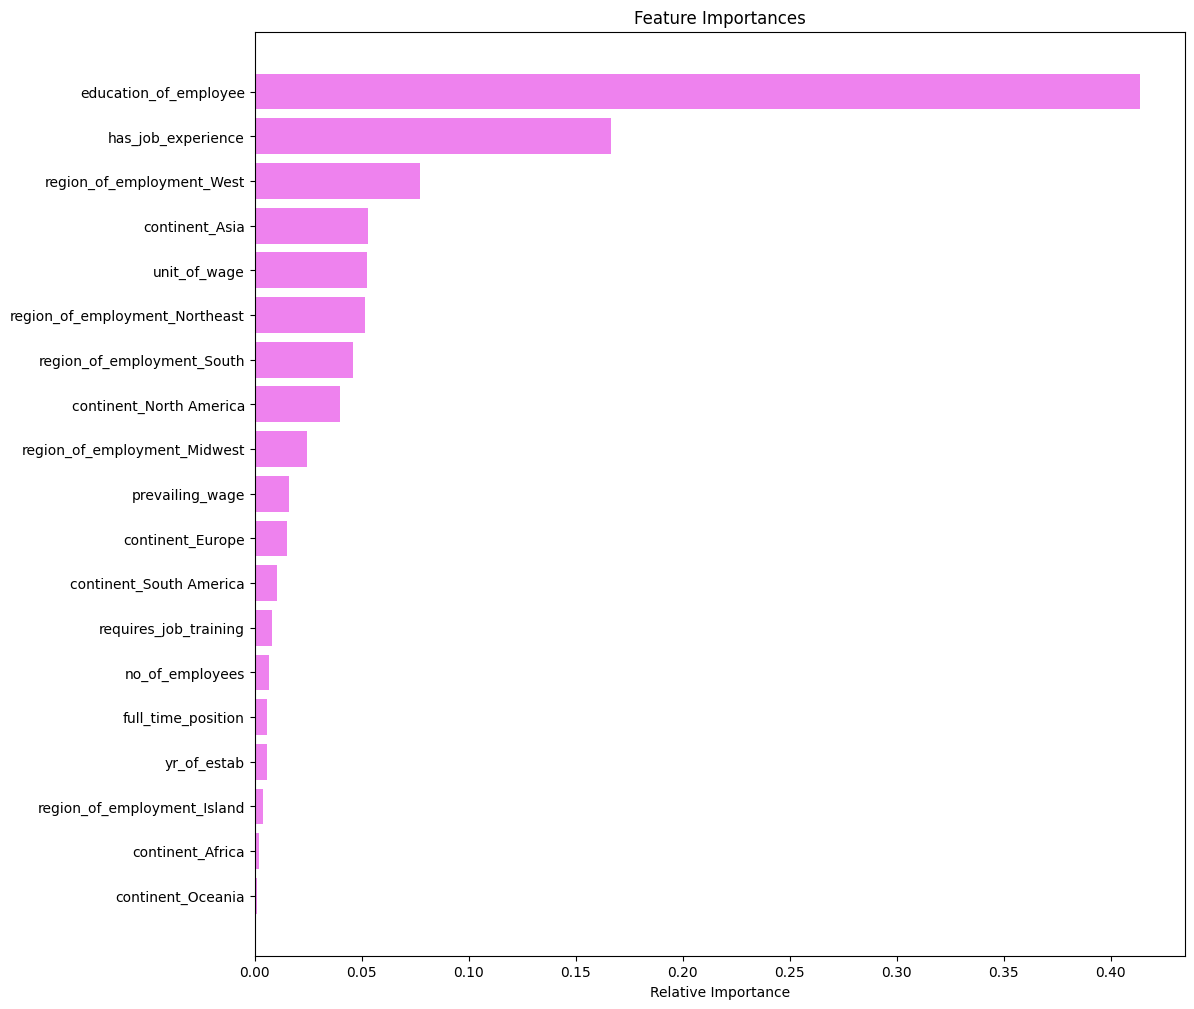

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

1. **Education Level and Visa approval insight and recommendation**: Application with higer education levels like Master's, Doctorate have significantly higher chance of visa approval. Recommendation is these employees with higher education are more likely to be approved so more encouragement and prioritization should be given to them.
2.**Wages and Visa approval insight and recommendation**: Higher wages have higher chances of approval. Recommendation is to make sure to target job roles with higher prevailing wages.
3. **Job experience and Visa approval insight and recommendation**: Applications with prior job experiencee are more likely to have their visa approved. That means experience is an important factor in case being certified. Encourage these applicants to apply.
4. **Unit of Wage and Visa approval insight and recommendation**: Looking at the insights it shows that permanent positions are more likely to be approved than hourly etc (contractor positions). Recommendation is to focus on the applications that are permanent positions.
5. **Continent and Visa approval insight and recommendation**:Some continents have higher chance of approval like Europe. More investigation is needed as it could be because of demand of skills, immigration policies etc.
6. **Region of employement and Visa approval insight and recommendation**: Visa approval rates vary depending on the region of employment. It could be because of labor demand in those areas so target these applicants from these regions.